In [34]:
# Numerical libraries
import numpy as np   
from scipy import stats

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

#importing seaborn for statistical plots
import seaborn as sns

In [35]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [36]:
# reading the CSV file into pandas dataframe
Airfare_df = pd.read_csv('http://users.stat.ufl.edu/~winner/data/airq402.dat',
            header=None, sep='\s+',)

In [122]:
# reading the CSV file into pandas dataframe and adding relevant columns. Market leading Airline is defined as MLA and Low price Airline is defined as LPA
dfairfare = pd.read_csv('http://users.stat.ufl.edu/~winner/data/airq402.dat', header=None, sep='\s+',)


In [123]:
dfairfare.columns = ['City1', 'City2', 'Average Fare', 'Distance', 'Average weekly passengers', 'market leading airline', 'market share MLA', 'Average fare MLA', 'Low price airline', 'market share LPA', 'price LPA']

# Q1 > Import and store the data in a data frame.

In [124]:
dfairfare

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share MLA,Average fare MLA,Low price airline,market share LPA,price LPA
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42
5,ALB,FLL,135.17,1204,199.02,WN,40.68,137.97,DL,17.09,127.69
6,ALB,LAS,152.85,2237,237.17,WN,59.94,148.59,WN,59.94,148.59
7,ALB,LAX,190.73,2467,191.95,DL,17.89,205.06,US,16.59,174.00
8,ALB,MCO,129.35,1073,550.54,WN,76.84,127.69,WN,76.84,127.69
9,ALB,TPA,134.17,1130,202.93,US,35.40,132.91,DL,26.40,124.78


# Q2  > Remove the outliers from the data


In [137]:
Q1, Q2, Q3 = np.percentile(dfairfare['Average Fare'],[25,50,75])

In [126]:
IQR = Q3 - Q1

In [127]:
IQR

71.41749999999999

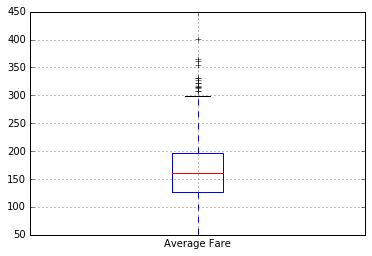

In [128]:
dfairfare.boxplot(column = 'Average Fare')

In [129]:
lower_bound= Q1 - 1.5 * IQR
lower_bound

18.84875000000001

In [130]:
upper_bound= Q3 + 1.5 * IQR
upper_bound

304.51874999999995

In [135]:
dfairfare = dfairfare[(np.abs(stats.zscore(dfairfare.select_dtypes(exclude='object'))) < 3).all(axis=1)]

In [138]:
dfairfare

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share MLA,Average fare MLA,Low price airline,market share LPA,price LPA
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42
5,ALB,FLL,135.17,1204,199.02,WN,40.68,137.97,DL,17.09,127.69
6,ALB,LAS,152.85,2237,237.17,WN,59.94,148.59,WN,59.94,148.59
7,ALB,LAX,190.73,2467,191.95,DL,17.89,205.06,US,16.59,174.00
8,ALB,MCO,129.35,1073,550.54,WN,76.84,127.69,WN,76.84,127.69
9,ALB,TPA,134.17,1130,202.93,US,35.40,132.91,DL,26.40,124.78


# Q3 > Treat “Average Fare” – 3rdColumn as your Dependent Variable and Rest of the columns as Independent Variable.